In [1]:
import torch
import numpy as np
import pandas as pd
import scanpy as sc
from typing import Tuple

# scVI imports
import scvi
from scvi.model.utils import mde
import pymde

torch.manual_seed(0)
np.random.seed(0)

/usr/local/lib/python3.8/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.8/dist-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda9SetDeviceEi'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
Global seed set to 0


In [2]:
adata = sc.read_h5ad('../../..//oscb/user_storage/Benchmarks/facs-Bladder_1750955885784/QC/facs_Bladder_Seurat.h5ad')

scvi.model.SCVI.setup_anndata(adata)
model = scvi.model.SCVI(adata, n_hidden = 192, n_latent = 50, n_layers = 1, gene_likelihood = 'zinb')
model.train(max_epochs = 400, early_stopping = True)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
/usr/local/lib/python3.8/dist-packages/scvi/data/_utils.py:119: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 188/400:  47%|███████████████████████████████████████████████████▏                                                         | 188/400 [01:02<01:10,  3.02it/s, loss=2.89e+04, v_num=1]
Monitored metric elbo_validation did not improve in the last 45 records. Best score: 30008.531. Signaling Trainer to stop.


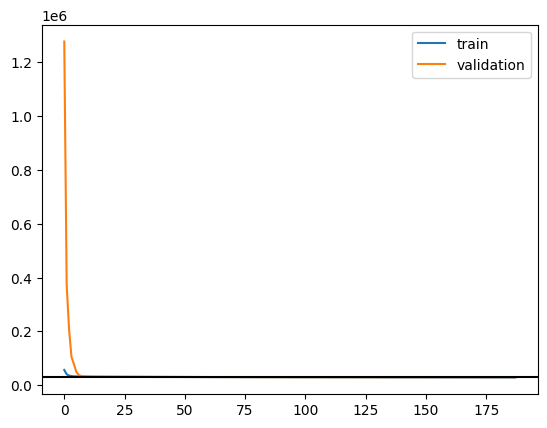

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

y = model.history['reconstruction_loss_validation']['reconstruction_loss_validation'].min()
plt.plot(model.history['reconstruction_loss_train']['reconstruction_loss_train'], label='train')
plt.plot(model.history['reconstruction_loss_validation']['reconstruction_loss_validation'], label='validation')

plt.axhline(y, c = 'k')

plt.legend()
plt.show()